<a href="https://colab.research.google.com/github/ksuemats/cellxgene/blob/main/Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

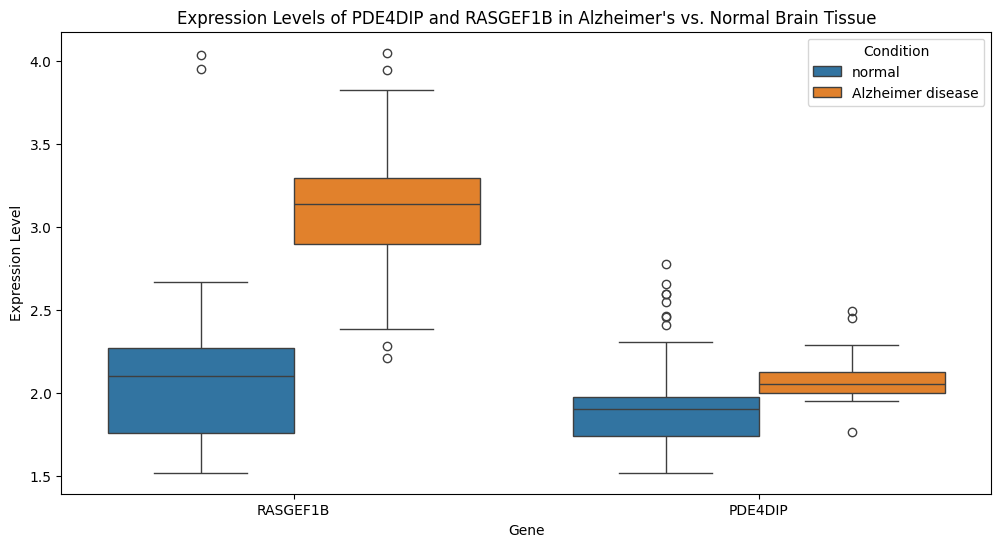


Gene: PDE4DIP
Alzheimer's group size: 23
Normal group size: 104
PDE4DIP - T-test between Alzheimer's and Normal: t-statistic = 3.42, p-value = 0.0009

Gene: RASGEF1B
Alzheimer's group size: 23
Normal group size: 112
RASGEF1B - T-test between Alzheimer's and Normal: t-statistic = 10.64, p-value = 0.0000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv('cellxgene_disease_edited.csv')

# Filter data for Alzheimer’s and normal samples for the genes of interest (PDE4DIP and RASGEF1B)
genes_of_interest = ['PDE4DIP', 'RASGEF1B']
filtered_data = data[data['Gene Symbol'].isin(genes_of_interest)]

# Remove rows with missing values in the 'Expression' column
filtered_data = filtered_data.dropna(subset=['Expression'])

# Visualization: Expression Levels of PDE4DIP and RASGEF1B in Alzheimer's vs. Normal Brain Tissue
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Gene Symbol', y='Expression', hue='Disease')
plt.title("Expression Levels of PDE4DIP and RASGEF1B in Alzheimer's vs. Normal Brain Tissue")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.legend(title="Condition")
plt.show()

# Statistical test: T-test for expression differences between Alzheimer's and normal samples for each gene
for gene in genes_of_interest:
    alzheimers_expression = filtered_data[(filtered_data['Gene Symbol'] == gene) & (filtered_data['Disease'] == 'Alzheimer disease')]['Expression']
    normal_expression = filtered_data[(filtered_data['Gene Symbol'] == gene) & (filtered_data['Disease'] == 'normal')]['Expression']

    print(f"\nGene: {gene}")
    print(f"Alzheimer's group size: {len(alzheimers_expression)}")
    print(f"Normal group size: {len(normal_expression)}")

    # Check if both groups have data
    if len(alzheimers_expression) > 0 and len(normal_expression) > 0:
        # Perform the t-test
        t_stat, p_val = ttest_ind(alzheimers_expression, normal_expression)
        print(f"{gene} - T-test between Alzheimer's and Normal: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
    else:
        print(f"{gene} - Insufficient data for one of the groups to perform the t-test.")